<a href="https://colab.research.google.com/github/jmestanza/deep-learning/blob/main/Mestanza-Joaquin-DL-TP%20Co17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Universidad de Buenos Aires
# Deep Learning - TP
# Cohorte 17 - 5to bimestre 2024


El TP comienza al momento de recibir este correo y la ventana de entrega estará abierta hasta **las 20hs del Lunes 02 de diciembre**. La resolución es individual. Pueden utilizar los contenidos vistos en clase y otra bibliografía. Si se toman ideas de fuentes externas deben ser correctamente citadas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un “link a un colab” (permitir acceso a las siguientes direcciones: alfonsorafel93@gmail.com y lelectronfou@gmail.com) y **se realizará en el siguiente link de google form: [link](https://docs.google.com/forms/d/e/1FAIpQLScnAC5wu1fIOqDKGrbdV8MZfU6AlJ6B7tBNNpL3qRAEGaudzg/viewform?usp=sf_link)**. Tanto los resultados, como el código y las explicaciones deben quedar guardados y visualizables en el colab.

NO ES NECESARIO QUE NOS ENVIEN COREEO AVISANDO DE LA ENTREGA!

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para la totalidad del examen.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-TP Co(numero de cohorte).ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código y las explicaciones deben quedar guardados y visualizables en el correspondiente link.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.


**Condiciones de aprobación**
- Se aprueba con más del 60% del examen bien resuelto de cada parte del TP (Parte 1 y Parte 2).
- La escala de notas empleada por la UBA es aprobado para nota igual o superior a 4.

# Parte 1
Descargar el dataset del siguiente link: https://drive.google.com/file/d/1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd/view?usp=sharing. El dataset son compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizarlo para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro.
- a) Praparacion del dataset: procesar las variables, explicar los criterios utilizados y analizar las distribuciones.

Particularmente para los puntos b), c) y d) vamos a tratar este problema como una clasificación donde queremos averiguar si el cliente pertenece al grupo 0 (gasta menos de 5000), al grupo 1 (gasta entre 5000 y 10000), al grupo 2 (gasta entre 10000 y 15000) o al grupo 3 (gasta más de 15000).
- b) Definir uno o varios puntos de comparacion (benchmark) para comparar los modelos. Pueden usarse modelos de ML clasico de facil entrenamiento.
- c) Entrenar un modelo de deep learning que no utilice embeddings, **descartando el `product_id` y `user_id`.** . Graficar las evoluciones de la funcion de costo y la metrica de validacion. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos.
- d)	Entrenar un modelo de deep learning que utilice **2 capas de embeddings**, una para los productos y otra para los usuarios. Graficar las evoluciones de la funcion de costo y la metrica de validacion. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos. Comparar contra el modelo sin embeddings.
Recordar que tanto para el punto c) como el d) pueden usarse herramientas como regularizacion y prueba de hiperpametros para conseguir mejores resultados.
- e) Para el modelo del punto d) implementar una funcion que a reciba un id de usuario y sugiera **n** cantidad usuarios que tuvieron un comportamiento de compras similar.
- f) Para el mejor modelo obtenido en el apartado d) elegir al menos 2 hiperparametros para tunear. Explicar el metodo utilizado y los resultados obtenidos. Recordar de explicar los criterios de eleccion de los hiperpametros, no elegirlos al azar.



# Parte 2.a

Implemente una arquitectura de red neuronal basada en CNN para identificar del dataset fashion MNIST las 10 clases del mismo. Sobre dicho modelo, realize una exploración de 5 variantes distintas (que se desprenden del modelo propuesto) variando alguno (o varios) de los siguientes hiperparámetros:
- numero de capas.
- numero de kernels.
- tamaño de kernels.


Evalue la evolución de la función de perdida y la accuracy (para train y test) para cada modelo en una gráfica con las curvas de los 5 modelos propuestos. Compare también el tiempo de entrenamiento y peso (tamaño) de cada modelo. Aplique técnicas de regularización para evitar overfitting. Elija el modelo que considera mejor y justifique.
Entregables:
 - Grafica comparativa de función de perdida vs epochs para los 5 modelos.
 - Grafica comparativa de función de accuracy vs epochs para los 5 modelos.
 - Tabla comparativa (o grafico de barras) del tiempo de entrenamiento y pesos de cada modelo.
 - Justificación del modelo elegio (qué consideró para elegir el modelo y bajo qué criterio).



In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
# Download train data from open datasets.
train_data= datasets.FashionMNIST(root='data', train=True, download=True, transform=ToTensor(),)

# Download test data from open datsets.
test_data=datasets.FashionMNIST(root='data', train=False, download=True, transform=ToTensor(),)


100%|██████████| 26.4M/26.4M [00:02<00:00, 12.6MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 198kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.73MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 4.25MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



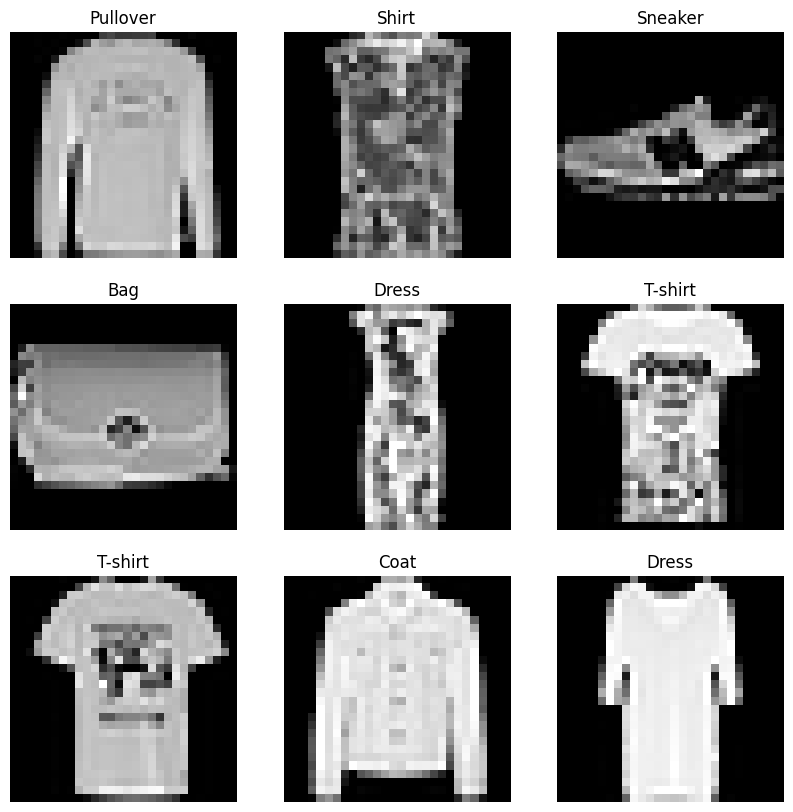

In [ ]:
import matplotlib.pyplot as plt

labels_map={
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot',
}

figure = plt.figure(figsize = (10,10))
cols, rows = 3, 3

for i in range (1, cols*rows + 1):
    sample_idx = torch.randint(len(train_data), size = (1,)).item()
    image, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap='gray')
plt.show()

# Parte 2.b

Empleando el modelo entrenado y elegido por Ud. en el punto anterior **(NO USAR RESNET U OTRO MODELO DISPONIBLE, TIENE QUE USAR EL QUE UD DESARROLLÓ)**, realice transfer learning para procesar las imágenes del dataset MNIST (los números) **e identificar los números mayores o menores a 4,5**.
Para el entrenamiento emplee solamente 20.000 muestras del set de entrenamiento y valide con el set de testeo. Al reducir el train set, mantenga equilibrada la distribución de las clases.

Elija la estrategia de transfer learning acorde a los visto en la teoría y justifique su elección.

Compare las curvas de entrenamiento y accurracy empleando transfer learning o usando la arquitectura elejida en el punto anterior pero entrenando desde cero.
Entregables:
- Estrategia elegida y su justificación.
- Grafica comparativa de función de perdida vs epochs para el modelo con transfer learning y sin transfer learning.
- Grafica comparativa de función de accuracy vs epochs para el modelo con transfer learning y sin transfer learning.
- Comentarios sobre las curvas graficadas.


## Resolución


In [ ]:
import os
dataset_path = '/content/dataset_black_sales.csv'
if not os.path.exists(dataset_path):
  print('Dataset not downloaded yet.')
  !gdown '1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd'

if os.path.exists(dataset_path):
  print('Dataset available.')



Dataset not downloaded yet.
Downloading...
From: https://drive.google.com/uc?id=1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd
To: /content/dataset_black_sales.csv
100% 25.5M/25.5M [00:00<00:00, 38.3MB/s]
Dataset available.


## 1.a Preparacion del dataset: procesar las variables, explicar los criterios utilizados y analizar las distribuciones.

In [ ]:
import pandas as pd
dataset = pd.read_csv(dataset_path)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Ver si User ID lo sacamos o utilizamos algun embedding

In [ ]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
(dataset.isnull().sum()/len(dataset))*100

,0
User_ID,0.000000
Product_ID,0.000000
Gender,0.000000
Age,0.000000
Occupation,0.000000
City_Category,0.000000
Stay_In_Current_City_Years,0.000000
Marital_Status,0.000000
Product_Category_1,0.000000
Product_Category_2,31.566643


Podemos ver que en cuanto a null values Product_Category_2 tiene 31.56% y Product_Category_3 69.67%.

Como el hecho de que no tenga una categoría también aporta información, reemplazaremos los NaN por 0, agregando una categoría para las que no tienen.

In [ ]:
dataset_wo_missings = dataset.copy()
dataset_wo_missings[['Product_Category_2', 'Product_Category_3']] = dataset_wo_missings[['Product_Category_2', 'Product_Category_3']].fillna(0)


In [ ]:
(dataset_wo_missings.isnull().sum()/len(dataset))*100

,0
User_ID,0.0
Product_ID,0.0
Gender,0.0
Age,0.0
Occupation,0.0
City_Category,0.0
Stay_In_Current_City_Years,0.0
Marital_Status,0.0
Product_Category_1,0.0
Product_Category_2,0.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def plot_distribution(dataframe, fields, callback, cols=3, figsize=(20,15)):
    rows = len(fields)//cols + 1
    f, axes = plt.subplots(rows,cols, figsize=figsize)
    axes = axes.flatten()

    for i,ax in enumerate(axes):
        if i < len(fields):
            callback(ax, dataframe[fields[i]])
        else:
            ax.axis('off')

In [ ]:
bin_count_vars = [
    'Gender',
    'Age',
    'Occupation',
    'City_Category',
    'Stay_In_Current_City_Years',
    'Marital_Status',
    'Product_Category_1',
    'Product_Category_2',
    'Product_Category_3'
]

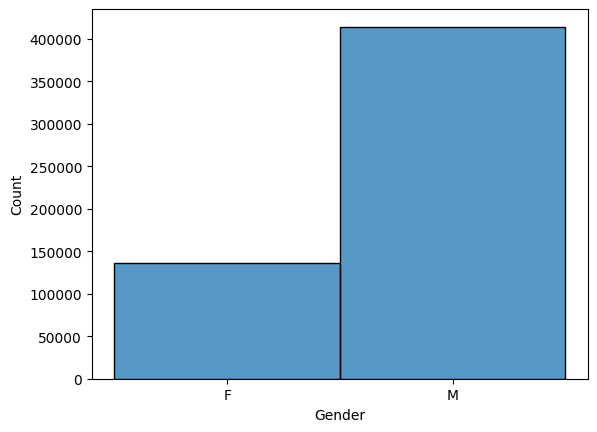

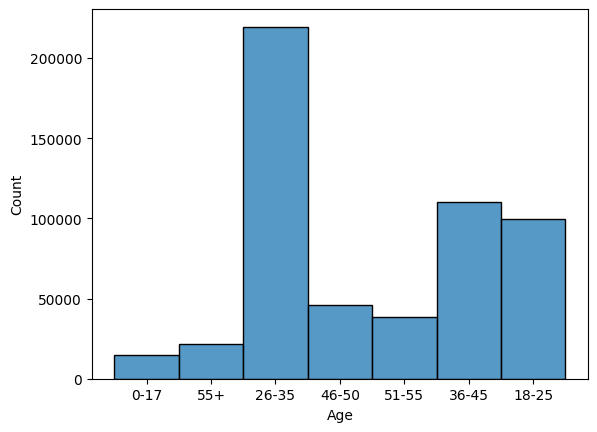

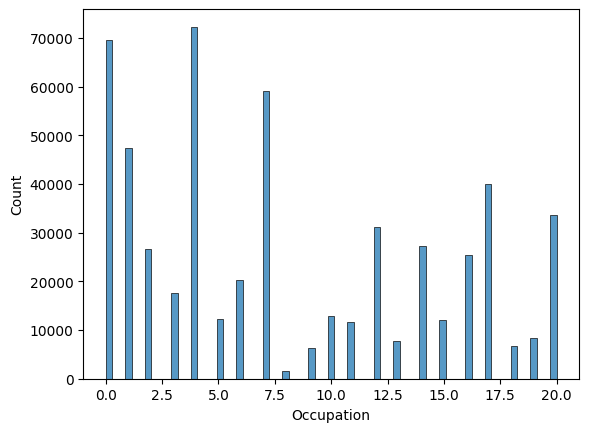

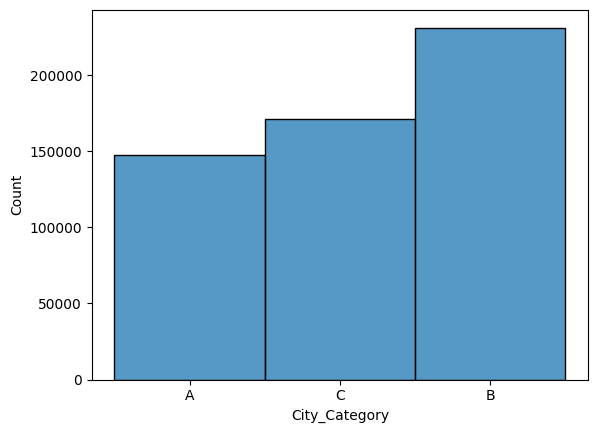

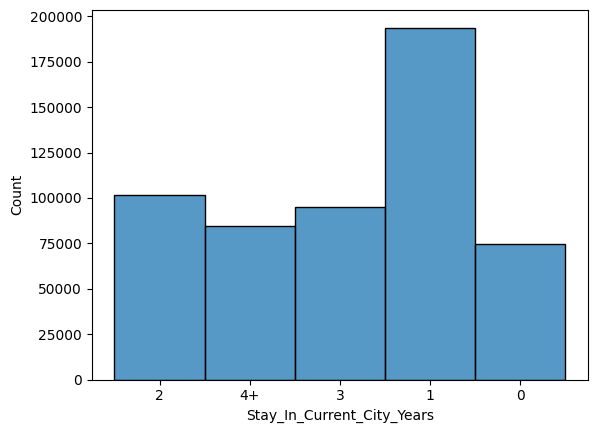

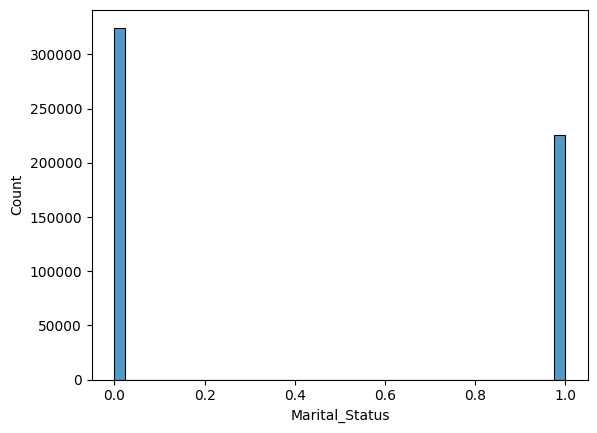

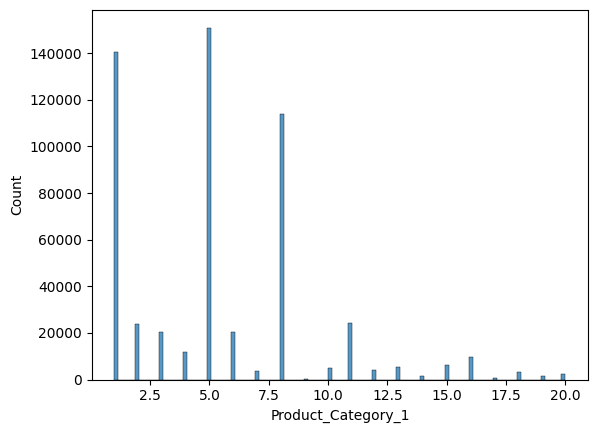

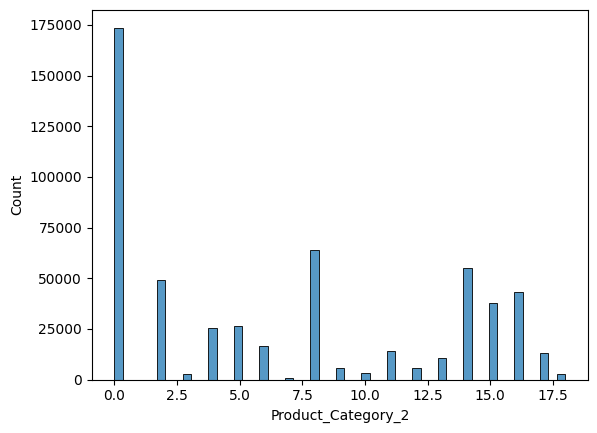

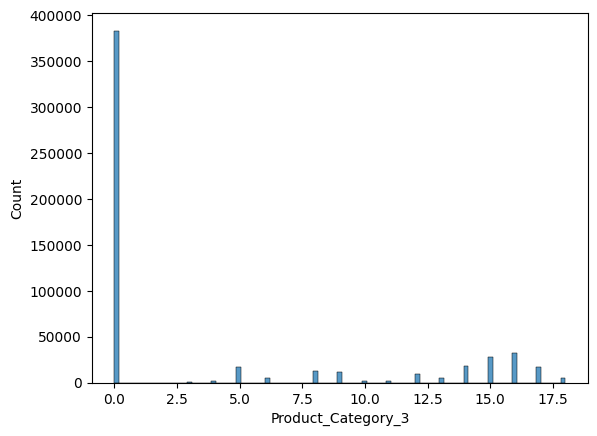

In [ ]:
# def bincount_cb(ax, data):
#     sns.histplot(data, ax=ax, shrink=0.8)  # Use histplot instead of displot


# plot_distribution(dataset, bin_count_vars, bincount_cb)
for var in bin_count_vars:
  sns.histplot(dataset_wo_missings[var])
  plt.show()

In [ ]:
histogram_vars = [
    'Purchase'
]

<Axes: xlabel='Purchase', ylabel='Count'>

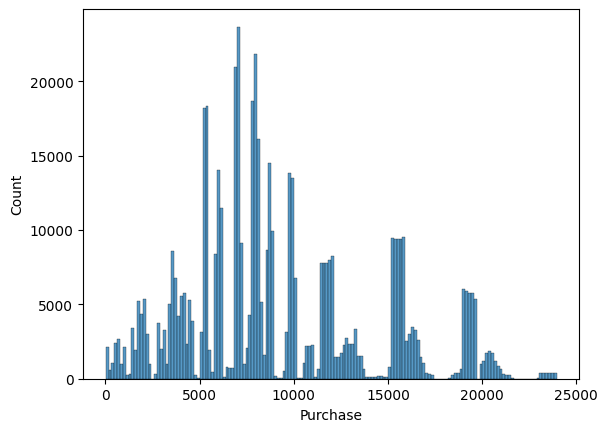

In [ ]:
sns.histplot(dataset_wo_missings['Purchase'])

In [ ]:
left_out_vars = [x for x in dataset.columns if x not in bin_count_vars+histogram_vars]
left_out_vars

['User_ID', 'Product_ID']

Preprocesamiento

In [ ]:
# Encode categorical variables
encoded_dataset = dataset_wo_missings.copy()
encoded_dataset['Gender'] =  encoded_dataset['Gender'].map({'F':0,'M':1})
encoded_dataset['Age'] = encoded_dataset['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
encoded_dataset['City_Category'] = encoded_dataset['City_Category'].map({'A':1,'B':2,'C':3})
encoded_dataset['Stay_In_Current_City_Years'] = encoded_dataset['Stay_In_Current_City_Years'].map({'0':0,'1':1,'2':2,'3':3,'4+':4})

encoded_dataset.head(15)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,1,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,1,10,1,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,1,10,1,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,7,16,3,4,0,8,0.0,0.0,7969
5,1000003,P00193542,1,3,15,1,3,0,1,2.0,0.0,15227
6,1000004,P00184942,1,5,7,2,2,1,1,8.0,17.0,19215
7,1000004,P00346142,1,5,7,2,2,1,1,15.0,0.0,15854
8,1000004,P0097242,1,5,7,2,2,1,1,16.0,0.0,15686
9,1000005,P00274942,1,3,20,1,1,1,8,0.0,0.0,7871


In [ ]:
unique_product_ids = encoded_dataset['Product_ID'].unique()
len(unique_product_ids)

3631

In [ ]:
# product_ids_group = encoded_dataset.groupby('Product_ID')['Product_Category_2'].min()
# product_ids_with_only_nan = encoded_dataset.groupby('Product_ID')['Product_Category_2'].min().isnull()
# product_ids_nans = product_ids_group[product_ids_with_only_nan]
# product_ids_nans.head()

In [ ]:
# product_ids_cat_2 = list(product_ids_nans.index)
# product_ids_cat_2[:5]

In [ ]:
# encoded_dataset[encoded_dataset["Product_ID"].isin(product_ids_cat_2)].head(10)

In [ ]:

# 0 (gasta menos de 5000), al grupo 1 (gasta entre 5000 y 10000), al grupo 2 (gasta entre 10000 y 15000) o al grupo 3 (gasta más de 15000).
def purchase_group(value):
  if value < 5000:
    return 0
  elif value < 10000:
    return 1
  elif value < 15000:
    return 2
  else:
    return 3

new_dataset = encoded_dataset.copy()
new_dataset['Group'] = dataset['Purchase'].apply(purchase_group)
new_dataset = new_dataset.drop(columns=['Purchase'])

In [ ]:
corr = new_dataset.drop(columns=['Product_ID', 'User_ID']).corr()
corr.style.background_gradient(cmap='coolwarm')

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Group
Gender,1.000000,-0.004262,0.117291,-0.004515,0.014660,-0.011603,-0.045594,-0.000954,0.036146,0.061712
Age,-0.004262,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.018770,-0.007422,0.013165
Occupation,0.117291,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,0.006712,0.012269,0.022017
City_Category,-0.004515,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,0.016003,0.035525,0.059660
Stay_In_Current_City_Years,0.014660,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,0.001262,0.001977,0.005514
Marital_Status,-0.011603,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,0.001099,-0.004629,-0.001295
Product_Category_1,-0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,-0.067877,-0.385534,-0.379869
Product_Category_2,-0.000954,0.018770,0.006712,0.016003,0.001262,0.001099,-0.067877,1.000000,0.094750,0.045650
Product_Category_3,0.036146,-0.007422,0.012269,0.035525,0.001977,-0.004629,-0.385534,0.094750,1.000000,0.298379
Group,0.061712,0.013165,0.022017,0.059660,0.005514,-0.001295,-0.379869,0.045650,0.298379,1.000000


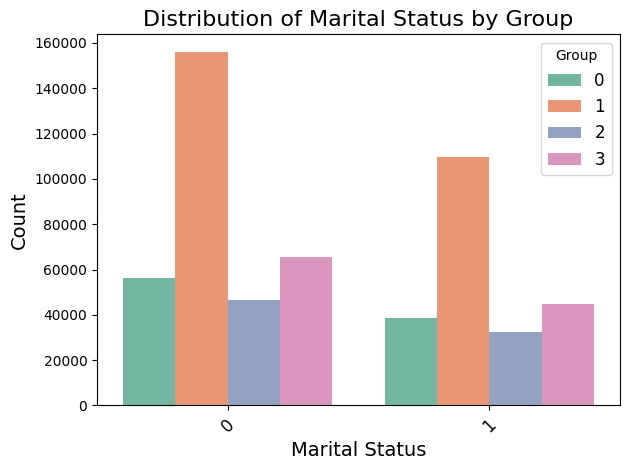

In [ ]:
sns.countplot(data=new_dataset, x='Marital_Status', hue='Group', palette='Set2')

# Add titles and labels
plt.title("Distribution of Marital Status by Group", fontsize=16)
plt.xlabel("Marital Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Group", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
new_dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Group
0,1000001,P00069042,0,1,10,1,2,0,3,0.0,0.0,1
1,1000001,P00248942,0,1,10,1,2,0,1,6.0,14.0,3
2,1000001,P00087842,0,1,10,1,2,0,12,0.0,0.0,0
3,1000001,P00085442,0,1,10,1,2,0,12,14.0,0.0,0
4,1000002,P00285442,1,7,16,3,4,0,8,0.0,0.0,1


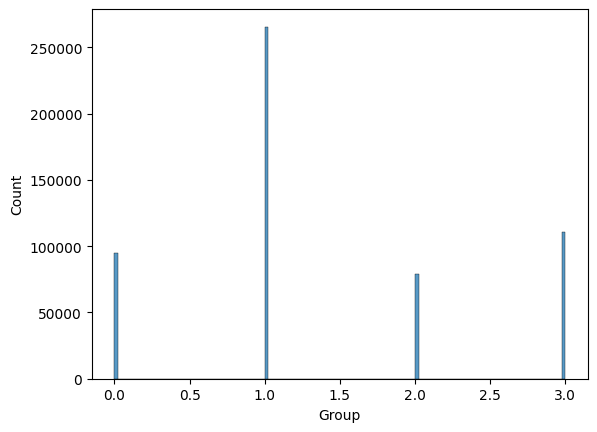

In [ ]:
sns.histplot(new_dataset['Group'])
plt.show()

Observamos que los datos están desbalanceados por lo cual tendremos que aplicar alguna técnica de balanceo en la parte del entrenamiento.

## 1. b Definir uno o varios puntos de comparacion (benchmark) para comparar los modelos. Pueden usarse modelos de ML clasico de facil entrenamiento.

- Logistic Regression
- KNN
- Decision Tree Classifier
- Random Forest Classifier

In [ ]:
dataset_wo_embeddings = new_dataset.drop(columns=['Product_ID', 'User_ID'])


```python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# 1. Define features and target
X = dataset_wo_embeddings.drop(columns=['Group'])  # Features
y = dataset_wo_embeddings['Group']                # Target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# 3. Standardize features (necessary for Logistic Regression and KNN)
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store models and results
models = {
    'Logistic Regression': LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)  # Added XGBoost
}

# 4. Train and evaluate models
for name, model in models.items():
    print(f"--- {name} ---")
    # For models sensitive to feature scaling
    if name in ['Logistic Regression', 'KNN']:
        model.fit(X_train_balanced_scaled, y_train_balanced)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train_balanced, y_train_balanced)
        y_pred = model.predict(X_test)

    # Evaluation
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Print feature importance if available
    if hasattr(model, "feature_importances_"):
        print("Feature Importances:")
        for feature, importance in zip(X.columns, model.feature_importances_):
            print(f"{feature}: {importance}")
    elif name == "Logistic Regression":  # Coefficients for logistic regression
        print("Feature Coefficients:")
        for feature, coef in zip(X.columns, model.coef_[0]):
            print(f"{feature}: {coef}")
    else:
        print("Feature importance not available for this model.")
    
    print("\n")


```

```
--- Logistic Regression ---
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
Accuracy: 0.4610079929221129
Confusion Matrix:
 [[13478  9100  2414  3485]
 [25031 39562  5148  9941]
 [ 3337  3367  7892  9109]
 [ 5068  3488  9457 15144]]
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.47      0.36     28477
           1       0.71      0.50      0.59     79682
           2       0.32      0.33      0.32     23705
           3       0.40      0.46      0.43     33157

    accuracy                           0.46    165021
   macro avg       0.43      0.44      0.42    165021
weighted avg       0.52      0.46      0.48    165021

Feature Coefficients:
Gender: -0.05411401258175218
Age: -0.13638359797093433
Occupation: -0.018147447139170565
City_Category: -0.12288464201931835
Stay_In_Current_City_Years: -0.02171922529537857
Marital_Status: -0.008386697894082498
Product_Category_1: 0.6923746908700974
Product_Category_2: 0.026791288904365003
Product_Category_3: -0.18666860438460287


--- KNN ---
Accuracy: 0.6264536028747857
Confusion Matrix:
 [[13265 11658  1863  1691]
 [ 8594 61656  5506  3926]
 [ 1806  4356  9493  8050]
 [ 1990  2816  9387 18964]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.47      0.49     28477
           1       0.77      0.77      0.77     79682
           2       0.36      0.40      0.38     23705
           3       0.58      0.57      0.58     33157

    accuracy                           0.63    165021
   macro avg       0.56      0.55      0.55    165021
weighted avg       0.63      0.63      0.63    165021

Feature importance not available for this model.


--- Decision Tree ---
Accuracy: 0.6303015979784391
Confusion Matrix:
 [[16789  8686  1615  1387]
 [14208 56353  6053  3068]
 [ 1342  3949 10317  8097]
 [ 1241  1652  9710 20554]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.59      0.54     28477
           1       0.80      0.71      0.75     79682
           2       0.37      0.44      0.40     23705
           3       0.62      0.62      0.62     33157

    accuracy                           0.63    165021
   macro avg       0.57      0.59      0.58    165021
weighted avg       0.65      0.63      0.64    165021

Feature Importances:
Gender: 0.0254792967546347
Age: 0.06587223869309038
Occupation: 0.12949804567851292
City_Category: 0.03186010413993017
Stay_In_Current_City_Years: 0.08108007187278791
Marital_Status: 0.03132802590425221
Product_Category_1: 0.5483609383191518
Product_Category_2: 0.055056268640055174
Product_Category_3: 0.031465009997584836


--- Random Forest ---
Accuracy: 0.6482023500039389
Confusion Matrix:
 [[16360  8898  1644  1575]
 [12383 57543  6380  3376]
 [  918  3280 10577  8930]
 [  786   877  9007 22487]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.57      0.56     28477
           1       0.82      0.72      0.77     79682
           2       0.38      0.45      0.41     23705
           3       0.62      0.68      0.65     33157

    accuracy                           0.65    165021
   macro avg       0.59      0.61      0.60    165021
weighted avg       0.67      0.65      0.65    165021

Feature Importances:
Gender: 0.011963335865678049
Age: 0.06037712272361352
Occupation: 0.1533433883246179
City_Category: 0.023159991783006397
Stay_In_Current_City_Years: 0.07505497401400256
Marital_Status: 0.017115570840089554
Product_Category_1: 0.4404219018194343
Product_Category_2: 0.13198695768063357
Product_Category_3: 0.08657675694892414


--- XGBoost ---
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:35:23] WARNING: /workspace/src/learner.cc:740:
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
Accuracy: 0.7045224547178844
Confusion Matrix:
 [[14006 10622  1822  2027]
 [ 5022 64039  6413  4208]
 [   63  2026 10521 11095]
 [   30    13  5419 27695]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.49      0.59     28477
           1       0.83      0.80      0.82     79682
           2       0.44      0.44      0.44     23705
           3       0.62      0.84      0.71     33157

    accuracy                           0.70    165021
   macro avg       0.65      0.64      0.64    165021
weighted avg       0.72      0.70      0.70    165021

Feature Importances:
Gender: 0.011607015505433083
Age: 0.013144494034349918
Occupation: 0.010802977718412876
City_Category: 0.02241281419992447
Stay_In_Current_City_Years: 0.010851064696907997
Marital_Status: 0.011075110174715519
Product_Category_1: 0.8703993558883667
Product_Category_2: 0.025580205023288727
Product_Category_3: 0.024126963689923286
```

Basado en la importancia de las features, podríamos eliminar son: Gender, Marital_Status y Stay_In_Current_City_Years por su baja score en todos los modelos excepto en Decision Tree que Stay_In_Current_City_Years es moderada.

```python

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# 1. Define features and target
X = dataset_wo_embeddings.drop(columns=['Group','Gender','Marital_Status','Stay_In_Current_City_Years'])  # Features
y = dataset_wo_embeddings['Group']                # Target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# 3. Standardize features (necessary for Logistic Regression and KNN)
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store models and results
models = {
    'Logistic Regression': LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)  # Added XGBoost
}

# 4. Train and evaluate models
for name, model in models.items():
    print(f"--- {name} ---")
    # For models sensitive to feature scaling
    if name in ['Logistic Regression', 'KNN']:
        model.fit(X_train_balanced_scaled, y_train_balanced)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train_balanced, y_train_balanced)
        y_pred = model.predict(X_test)

    # Evaluation
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Print feature importance if available
    if hasattr(model, "feature_importances_"):
        print("Feature Importances:")
        for feature, importance in zip(X.columns, model.feature_importances_):
            print(f"{feature}: {importance}")
    elif name == "Logistic Regression":  # Coefficients for logistic regression
        print("Feature Coefficients:")
        for feature, coef in zip(X.columns, model.coef_[0]):
            print(f"{feature}: {coef}")
    else:
        print("Feature importance not available for this model.")
    
    print("\n")


```

```
--- Logistic Regression ---
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
Accuracy: 0.46392883330000423
Confusion Matrix:
 [[13190  9329  2419  3539]
 [24362 40192  5078 10050]
 [ 3463  3037  8238  8967]
 [ 5105  2526 10588 14938]]
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.46      0.35     28477
           1       0.73      0.50      0.60     79682
           2       0.31      0.35      0.33     23705
           3       0.40      0.45      0.42     33157

    accuracy                           0.46    165021
   macro avg       0.43      0.44      0.43    165021
weighted avg       0.53      0.46      0.48    165021

Feature Coefficients:
Age: -0.1332514313847227
Occupation: -0.025275318798319117
City_Category: -0.11190724027082216
Product_Category_1: 0.6932666683248826
Product_Category_2: 0.02803605111011877
Product_Category_3: -0.1853471973190955


--- KNN ---
Accuracy: 0.6560558959162773
Confusion Matrix:
 [[12941 12489  1371  1676]
 [ 6767 64722  4620  3573]
 [  991  4969  8661  9084]
 [  929  2218  8071 21939]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.45      0.52     28477
           1       0.77      0.81      0.79     79682
           2       0.38      0.37      0.37     23705
           3       0.60      0.66      0.63     33157

    accuracy                           0.66    165021
   macro avg       0.59      0.57      0.58    165021
weighted avg       0.65      0.66      0.65    165021

Feature importance not available for this model.


--- Decision Tree ---
Accuracy: 0.6714115173220379
Confusion Matrix:
 [[14568 10404  1684  1821]
 [ 8023 61757  5915  3987]
 [  584  2856 10360  9905]
 [  493   529  8023 24112]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.51      0.56     28477
           1       0.82      0.78      0.80     79682
           2       0.40      0.44      0.42     23705
           3       0.61      0.73      0.66     33157

    accuracy                           0.67    165021
   macro avg       0.61      0.61      0.61    165021
weighted avg       0.68      0.67      0.67    165021

Feature Importances:
Age: 0.049675708601945694
Occupation: 0.0984713613372276
City_Category: 0.025457529444158085
Product_Category_1: 0.7426559853575044
Product_Category_2: 0.051690345033405576
Product_Category_3: 0.03204907022575863


--- Random Forest ---
Accuracy: 0.6751746747383667
Confusion Matrix:
 [[14382 10509  1696  1890]
 [ 7509 62009  6037  4127]
 [  445  2635 10410 10215]
 [  378   342  7820 24617]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.51      0.56     28477
           1       0.82      0.78      0.80     79682
           2       0.40      0.44      0.42     23705
           3       0.60      0.74      0.67     33157

    accuracy                           0.68    165021
   macro avg       0.61      0.62      0.61    165021
weighted avg       0.68      0.68      0.68    165021

Feature Importances:
Age: 0.04052600809469567
Occupation: 0.11105157616617661
City_Category: 0.016163748065744853
Product_Category_1: 0.6000788173893864
Product_Category_2: 0.13635817019460292
Product_Category_3: 0.09582168008939355


--- XGBoost ---
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:42:20] WARNING: /workspace/src/learner.cc:740:
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
Accuracy: 0.7058313790366074
Confusion Matrix:
 [[13483 11138  1753  2103]
 [ 4216 64823  6286  4357]
 [   78  2012 10235 11380]
 [   42     7  5172 27936]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.47      0.58     28477
           1       0.83      0.81      0.82     79682
           2       0.44      0.43      0.43     23705
           3       0.61      0.84      0.71     33157

    accuracy                           0.71    165021
   macro avg       0.66      0.64      0.64    165021
weighted avg       0.72      0.71      0.70    165021

Feature Importances:
Age: 0.011583812534809113
Occupation: 0.009028565138578415
City_Category: 0.01783536933362484
Product_Category_1: 0.9153913855552673
Product_Category_2: 0.023112284019589424
Product_Category_3: 0.023048657923936844
```

In [ ]:
dataset_feature_reduced = dataset_wo_embeddings.drop(columns=['Gender','Marital_Status','Stay_In_Current_City_Years'])

Performance de los modelos:
Logistic Regression: Sigue aproximadamente igual (accuracy: ~46%), indicando que las features no eran criticas para este modelo.
KNN: La accuracy incremento de un 63% a 65.6%.
Decision Tree: La accuracy incremento de from 63% a 67.1%.
Random Forest: Incremento de 64.8% a 67.5%.
XGBoost: Accuracy improved slightly from 70.4% to 70.6%, no cambio practicamente en nada.

En lineas generales no se produjo un impacto grande en las métricas después de remover esos features.

## 1.c Entrenar un modelo de deep learning que no utilice embeddings, **descartando el `product_id` y `user_id`.** . Graficar las evoluciones de la funcion de costo y la metrica de validacion. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos.

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 1. Define features and target
X = dataset_feature_reduced.drop(columns=['Group'])  # Features
y = dataset_feature_reduced['Group']                # Target
X = X.to_numpy()
y = y.to_numpy()

print(X.shape)
print(y.shape)

# 2. Train-test split
# X_train_unbalanced, X_val, y_train_unbalanced, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

x_norm = (X - np.min(X, axis=0)) / (np.max(X, axis=0 ) - np.min(X, axis=0))


# Divido el dataset
idx = np.random.permutation(x_norm.shape[0])
train_idx = idx[0:int(0.85*len(idx))]
valid_idx = idx[int(0.85*len(idx)):]

X_train = x_norm[train_idx]
# X_train = X[train_idx]
y_train = y[train_idx]
X_val = x_norm[valid_idx]
# X_val = X[valid_idx]
y_val = y[valid_idx]


# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train_unbalanced, y_train_unbalanced)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_unscaled)
# X_test_scaled = scaler.transform(X_test)

# X_train = X_train_scaled
# y_train = y_train
# X_test = X_test_scaled
# y_test = y_test


# X_train = X_train_unscaled
# y_train = y_train
# X_test = X_test
# y_test = y_test


# X_train = X_train_unbalanced
# y_train = y_train_unbalanced
# X_test = X_test
# y_test = y_test


# pca = PCA(n_components=0.95)
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)

# X_train = X_train_pca
# X_test = X_test_pca

class MyDataset(Dataset):

  #__init__ guarda el dataset en una variable de clase
  def __init__(self, x, y):
    self.x = x
    self.y = y

  # __len__ define el comportamiento de la función len() sobre el objeto
  def __len__(self):
    return self.x.shape[0]

  # __getitem__ define el comportamiento de los []
  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

print(X_train[0])
print(y_train[0])
print(X_val[0])
print(y_val[0])


train_ds = MyDataset(X_train, y_train)
valid_ds = MyDataset(X_val, y_val)

train_dataloader = DataLoader(train_ds, batch_size=64, shuffle= True)
valid_dataloader = DataLoader(valid_ds, batch_size=64)

import torch.optim as optim

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNetwork, self).__init__()
        # self.fc = nn.Sequential(
        #     nn.Linear(input_size, 8),
        #     nn.ReLU(),
        #     # nn.Dropout(0.3),
        #     # nn.Linear(16, 8),
        #     # nn.ReLU(),
        #     # nn.Dropout(0.3),
        #     nn.Linear(8, num_classes)
        # )

        # --
        # Epoch 0 | Train/Valid loss: 0.056 / 0.053 | Train/Valid accuracy: 0.598 / 0.632 -> sin pca y batch_size=16 lr = 0.01
        # self.fc = nn.Sequential(
        #     nn.Linear(input_size, 200, bias=True),
        #     nn.ReLU(),
        #     nn.Linear(200, 100, bias=True),
        #     nn.ReLU(),
        #     nn.Linear(100, 50, bias=True),
        #     nn.ReLU(),
        #     nn.Linear(50, num_classes, bias=True)
        # )

        #Epoch 0 | Train/Valid loss: 0.054 / 0.052 | Train/Valid accuracy: 0.616 / 0.702 -> PCA(0.95) y batch_size=16 lr = 0.01
        # self.fc = nn.Sequential(
        #     nn.Linear(input_size, 128, bias=True),
        #     nn.ReLU(),
        #     nn.Linear(128, 64, bias=True),
        #     nn.ReLU(),
        #     nn.Linear(64, num_classes, bias=True)
        # )

# Epoch 0 | Train/Valid loss: 0.013 / 0.013 | Train/Valid accuracy: 0.614 / 0.701 #  PCA(0.95) y batch_size=16 lr = 0.01
# Epoch 1 | Train/Valid loss: 0.013 / 0.013 | Train/Valid accuracy: 0.625 / 0.676
      # self.fc = nn.Sequential(
      #     nn.Linear(input_size, 128, bias=True),
      #     nn.ReLU(),
      #     nn.Linear(128, 64, bias=True),
      #     nn.ReLU(),
      #     nn.Linear(64, num_classes, bias=True)
      # )
# Epoch 0 | Train/Valid loss: 0.018 / 0.017 | Train/Valid accuracy: 0.421 / 0.480. PCA(0.95) y batch_size=64 lr = 0.1
# Epoch 1 | Train/Valid loss: 0.018 / 0.018 | Train/Valid accuracy: 0.412 / 0.404
        # self.fc = nn.Sequential(
        #     nn.Linear(input_size, 128, bias=True),
        #     nn.ReLU(),
        #     nn.Linear(128, 64, bias=True),
        #     nn.ReLU(),
        #     nn.Linear(64, num_classes, bias=True)
        # )

# ahora que vimos algunos modelos, agarremos el mejor y pongamos regularizacion
#  Epoch 0 | Train/Valid loss: 0.015 / 0.013 | Train/Valid accuracy: 0.571 / 0.706 --> PCA(0.95) y batch_size=64 lr = 0.1, dropdouts
#  Epoch 1 | Train/Valid loss: 0.014 / 0.013 | Train/Valid accuracy: 0.593 / 0.697

        # self.fc = nn.Sequential(
        #     nn.Linear(input_size, 128, bias=True),
        #     nn.ReLU(),
        #     nn.Dropout(0.3),
        #     nn.Linear(128, 64, bias=True),
        #     nn.ReLU(),
        #     nn.Dropout(0.3),
        #     nn.Linear(64, num_classes, bias=True)
        # )

#         Epoch 0 | Train/Valid loss: 0.014 / 0.014 | Train/Valid accuracy: 0.599 / 0.601
#        Epoch 1 | Train/Valid loss: 0.013 / 0.013 | Train/Valid accuracy: 0.620 / 0.685
#        Epoch 2 | Train/Valid loss: 0.013 / 0.013 | Train/Valid accuracy: 0.624 / 0.690

        # self.fc = nn.Sequential(
        #     nn.Linear(input_size, 16, bias=True),
        #     nn.ReLU(),
        #     nn.Linear(16, 8, bias=True),
        #     nn.ReLU(),
        #     nn.Linear(8, num_classes, bias=True)
        # )
#  Epoch 4 | Train/Valid loss: 0.013 / 0.013 | Train/Valid accuracy: 0.629 / 0.711

        # self.fc = nn.Sequential(
        #     nn.Linear(input_size, 32, bias=True),
        #     nn.ReLU(),
        #     nn.Linear(32, 16, bias=True),
        #     nn.ReLU(),
        #     nn.Linear(16, 8, bias=True),
        #     nn.ReLU(),
        #     nn.Linear(8, num_classes, bias=True)
        # )

        # self.fc = nn.Sequential(
        #     nn.Linear(input_size, 32, bias=True),
        #     nn.ReLU(),
        #     nn.Linear(32, 16, bias=True),
        #     nn.ReLU(),
        #     nn.Linear(16, 8, bias=True),
        #     nn.ReLU(),
        #     nn.Linear(8, num_classes, bias=True)
        # )

# normalizando y dividiendo el dataset en clase, lr = 0.01
        # self.fc = nn.Sequential(
        #     nn.Linear(input_size, 64, bias=True),
        #     nn.ReLU(),
        #     nn.Linear(64, 16, bias=True),
        #     nn.ReLU(),
        #     nn.Linear(16, num_classes, bias=True)
        # )
        self.fc = nn.Sequential(
            nn.Linear(input_size, 64, bias=True),
            nn.ReLU(),
            nn.Linear(64, 16, bias=True),
            nn.ReLU(),
            nn.Linear(16, num_classes, bias=True)
        )

    def forward(self, x):
        return self.fc(x)

input_size = X_train.shape[1]
num_classes = len(set(y))
model = NeuralNetwork(input_size, num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(model)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# cantidad de epochs
epochs = 10

(550068, 6)
(550068,)
[0.33333333 0.         0.         0.36842105 0.88888889 0.        ]
1
[0.33333333 0.8        0.5        0.         0.88888889 0.        ]
1
NeuralNetwork(
  (fc): Sequential(
    (0): Linear(in_features=6, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=4, bias=True)
  )
)


```python
# Lists to store loss and accuracy values per epoch
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

for epoch in range(epochs):
    ############################################
    ## Training
    ############################################
    model.train()
    epoch_loss = 0
    epoch_y_hat = []
    epoch_y = []

    for data in train_dataloader:
        x_batch, y_batch = data
        x_batch = x_batch.to(device).float()
        y_batch = y_batch.to(device).squeeze().long()  # Correct target shape

        # Forward pass
        optimizer.zero_grad()
        nnet_output = model(x_batch)

        # Compute loss
        loss = criterion(nnet_output, y_batch)

        # Backpropagation and optimizer step
        loss.backward()
        optimizer.step()

        # Metrics
        epoch_loss += loss.item()
        epoch_y += list(y_batch.detach().cpu().numpy())
        epoch_y_hat += list(nnet_output.argmax(dim=1).detach().cpu().numpy())

    epoch_loss = epoch_loss / len(train_dataloader.dataset)
    accuracy = metrics.accuracy_score(epoch_y, epoch_y_hat)

    train_losses.append(epoch_loss)  # Store training loss
    train_accuracies.append(accuracy)  # Store training accuracy

    ############################################
    ## Validation
    ############################################
    model.eval()
    valid_epoch_loss = 0
    valid_epoch_y_hat = []
    valid_epoch_y = []

    with torch.no_grad():  # Disable gradient computation
        for data in valid_dataloader:
            x_batch, y_batch = data
            x_batch = x_batch.to(device).float()
            y_batch = y_batch.to(device).squeeze().long()  # Correct target shape

            # Forward pass
            nnet_output = model(x_batch)

            # Compute loss
            loss = criterion(nnet_output, y_batch)

            # Metrics
            valid_epoch_loss += loss.item()
            valid_epoch_y += list(y_batch.detach().cpu().numpy())
            valid_epoch_y_hat += list(nnet_output.argmax(dim=1).detach().cpu().numpy())

    valid_epoch_loss = valid_epoch_loss / len(valid_dataloader.dataset)
    valid_accuracy = metrics.accuracy_score(valid_epoch_y, valid_epoch_y_hat)

    valid_losses.append(valid_epoch_loss)  # Store validation loss
    valid_accuracies.append(valid_accuracy)  # Store validation accuracy

    # ############################################
    # ## Results by epoch
    # ############################################

    classification_rep = metrics.classification_report(valid_epoch_y, valid_epoch_y_hat)

    ############################################
    ## Results by epoch
    ############################################
    print(f"Epoch {epoch}")
    print(f"Train/Valid Loss: {epoch_loss:.3f} / {valid_epoch_loss}")
    print(f"Train/Valid Accuracy: {accuracy:.3f} / {valid_accuracy:.3f}")
    print("\nClassification Report:\n", classification_rep)
```


```
Epoch 0
Train/Valid Loss: 0.013 / 0.011943364946735079
Train/Valid Accuracy: 0.682 / 0.706

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.45      0.57     14219
           1       0.82      0.83      0.83     39894
           2       0.51      0.28      0.36     11814
           3       0.56      0.94      0.70     16584

    accuracy                           0.71     82511
   macro avg       0.67      0.62      0.61     82511
weighted avg       0.72      0.71      0.69     82511

Epoch 1
Train/Valid Loss: 0.012 / 0.01169329722165654
Train/Valid Accuracy: 0.705 / 0.704

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.44      0.57     14219
           1       0.80      0.85      0.82     39894
           2       0.53      0.16      0.25     11814
           3       0.56      0.96      0.71     16584

    accuracy                           0.70     82511
   macro avg       0.67      0.60      0.59     82511
weighted avg       0.71      0.70      0.67     82511

Epoch 2
Train/Valid Loss: 0.012 / 0.011582092626552146
Train/Valid Accuracy: 0.707 / 0.704

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.45      0.58     14219
           1       0.83      0.83      0.83     39894
           2       0.58      0.19      0.29     11814
           3       0.53      0.99      0.69     16584

    accuracy                           0.70     82511
   macro avg       0.69      0.61      0.60     82511
weighted avg       0.73      0.70      0.68     82511

Epoch 3
Train/Valid Loss: 0.012 / 0.011524525486709661
Train/Valid Accuracy: 0.708 / 0.707

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.44      0.57     14219
           1       0.78      0.87      0.82     39894
           2       0.59      0.14      0.23     11814
           3       0.57      0.96      0.71     16584

    accuracy                           0.71     82511
   macro avg       0.69      0.60      0.58     82511
weighted avg       0.72      0.71      0.67     82511

Epoch 4
Train/Valid Loss: 0.012 / 0.011490906013478321
Train/Valid Accuracy: 0.708 / 0.706

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.45      0.58     14219
           1       0.83      0.83      0.83     39894
           2       0.55      0.21      0.31     11814
           3       0.54      0.98      0.70     16584

    accuracy                           0.71     82511
   macro avg       0.68      0.62      0.60     82511
weighted avg       0.73      0.71      0.68     82511

Epoch 5
Train/Valid Loss: 0.011 / 0.0116232635891492
Train/Valid Accuracy: 0.708 / 0.710

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.45      0.58     14219
           1       0.83      0.83      0.83     39894
           2       0.51      0.28      0.36     11814
           3       0.57      0.96      0.71     16584

    accuracy                           0.71     82511
   macro avg       0.67      0.63      0.62     82511
weighted avg       0.72      0.71      0.69     82511

Epoch 6
Train/Valid Loss: 0.011 / 0.011480272283997449
Train/Valid Accuracy: 0.708 / 0.708

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.45      0.58     14219
           1       0.79      0.86      0.82     39894
           2       0.55      0.19      0.29     11814
           3       0.57      0.94      0.71     16584

    accuracy                           0.71     82511
   macro avg       0.68      0.61      0.60     82511
weighted avg       0.72      0.71      0.68     82511

Epoch 7
Train/Valid Loss: 0.011 / 0.011396399612183227
Train/Valid Accuracy: 0.708 / 0.709

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.45      0.58     14219
           1       0.82      0.84      0.83     39894
           2       0.53      0.26      0.35     11814
           3       0.56      0.95      0.71     16584

    accuracy                           0.71     82511
   macro avg       0.68      0.62      0.61     82511
weighted avg       0.72      0.71      0.69     82511

Epoch 8
Train/Valid Loss: 0.011 / 0.011453174261134241
Train/Valid Accuracy: 0.708 / 0.709

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.45      0.58     14219
           1       0.82      0.84      0.83     39894
           2       0.54      0.24      0.33     11814
           3       0.56      0.96      0.71     16584

    accuracy                           0.71     82511
   macro avg       0.68      0.62      0.61     82511
weighted avg       0.72      0.71      0.69     82511

Epoch 9
Train/Valid Loss: 0.011 / 0.011354103178214609
Train/Valid Accuracy: 0.709 / 0.710

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.44      0.57     14219
           1       0.80      0.85      0.83     39894
           2       0.55      0.22      0.31     11814
           3       0.57      0.96      0.71     16584

    accuracy                           0.71     82511
   macro avg       0.68      0.62      0.60     82511
weighted avg       0.72      0.71      0.69     82511
```

```python
# Plotting the training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, label='Train Loss')
plt.plot(range(epochs), valid_losses, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Validation Loss')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracies, label='Train Accuracy')
plt.plot(range(epochs), valid_accuracies, label='Valid Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Validation Accuracy')

plt.tight_layout()
plt.show()
```

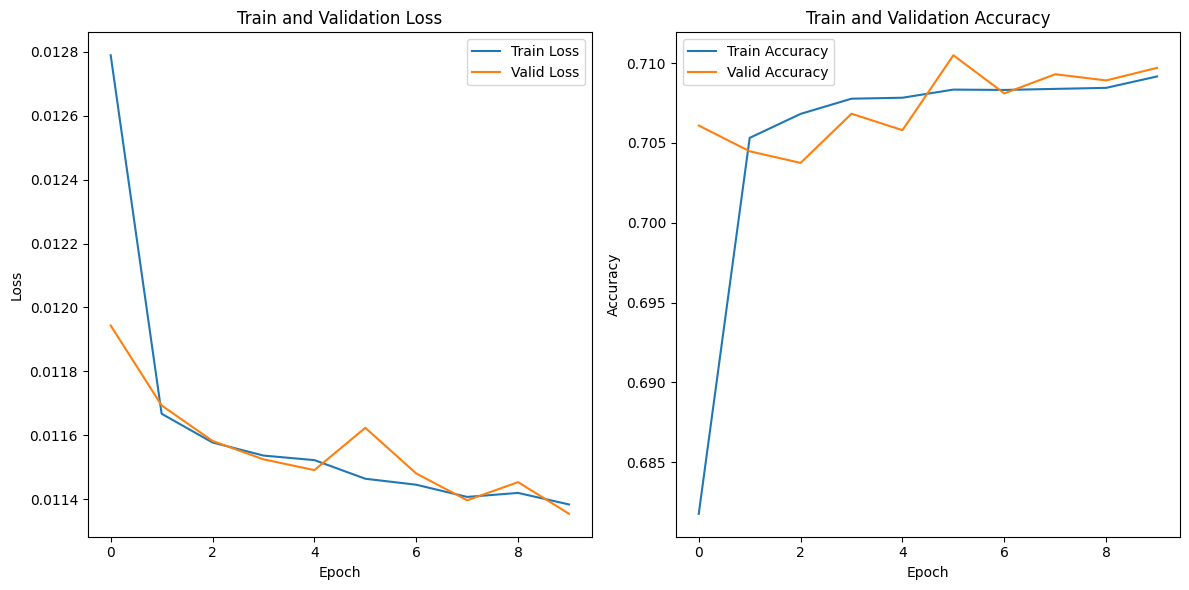

Vemos que la función de costo baja y el accuracy incrementa en train, lo cual es un comportamiento esperado. Significa que el modelo está aprendiendo.
A su vez poco a poco empieza a superar en ambas métricas a la de validación, lo cual también era lo esperado.

## 1.d) Entrenar un modelo de deep learning que utilice 2 capas de embeddings, una para los productos y otra para los usuarios. Graficar las evoluciones de la funcion de costo y la metrica de validacion. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos. Comparar contra el modelo sin embeddings. Recordar que tanto para el punto c) como el d) pueden usarse herramientas como regularizacion y prueba de hiperpametros para conseguir mejores resultados.

In [ ]:
dataset_with_embeddings = new_dataset.drop(columns=['Gender','Marital_Status','Stay_In_Current_City_Years'])
dataset_with_embeddings.head()

,User_ID,Product_ID,Age,Occupation,City_Category,Product_Category_1,Product_Category_2,Product_Category_3,Group
0,1000001,P00069042,1,10,1,3,0.0,0.0,1
1,1000001,P00248942,1,10,1,1,6.0,14.0,3
2,1000001,P00087842,1,10,1,12,0.0,0.0,0
3,1000001,P00085442,1,10,1,12,14.0,0.0,0
4,1000002,P00285442,7,16,3,8,0.0,0.0,1


In [ ]:
product_id = dataset_with_embeddings['Product_ID']
user_id = dataset_with_embeddings['User_ID']

In [ ]:
len(user_id.unique())

5891

In [ ]:
user_id.unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [ ]:
len(product_id.unique())

3631

In [ ]:
product_id.unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [ ]:
product_id_to_idx = {value:i for i,value in enumerate(product_id.unique())}
user_id_to_idx = {value:i for i,value in enumerate(user_id.unique())}
print(user_id_to_idx)

{1000001: 0, 1000002: 1, 1000003: 2, 1000004: 3, 1000005: 4, 1000006: 5, 1000007: 6, 1000008: 7, 1000009: 8, 1000010: 9, 1000011: 10, 1000012: 11, 1000013: 12, 1000014: 13, 1000015: 14, 1000016: 15, 1000017: 16, 1000018: 17, 1000019: 18, 1000021: 19, 1000022: 20, 1000023: 21, 1000024: 22, 1000025: 23, 1000026: 24, 1000027: 25, 1000028: 26, 1000029: 27, 1000030: 28, 1000031: 29, 1000032: 30, 1000033: 31, 1000034: 32, 1000035: 33, 1000036: 34, 1000037: 35, 1000039: 36, 1000041: 37, 1000042: 38, 1000043: 39, 1000044: 40, 1000045: 41, 1000046: 42, 1000047: 43, 1000048: 44, 1000049: 45, 1000050: 46, 1000051: 47, 1000052: 48, 1000053: 49, 1000054: 50, 1000056: 51, 1000057: 52, 1000058: 53, 1000059: 54, 1000060: 55, 1000061: 56, 1000062: 57, 1000063: 58, 1000064: 59, 1000065: 60, 1000066: 61, 1000067: 62, 1000068: 63, 1000069: 64, 1000070: 65, 1000071: 66, 1000072: 67, 1000073: 68, 1000074: 69, 1000075: 70, 1000076: 71, 1000077: 72, 1000078: 73, 1000079: 74, 1000080: 75, 1000081: 76, 1000082:

In [ ]:
product_idx = np.array([product_id_to_idx[value] for value in product_id])
product_idx

array([   0,    1,    2, ..., 3626, 3626, 3629])

In [ ]:
user_idx = np.array([user_id_to_idx[value] for value in user_id])
user_idx

array([   0,    0,    0, ..., 5328, 5878, 5330])

In [ ]:
product_idx_train = product_idx[train_idx]
product_idx_valid = product_idx[valid_idx]


user_idx_train = user_idx[train_idx]
user_idx_valid = user_idx[valid_idx]

In [ ]:
# Clase Dataset de Pytorch con embeddings
class MyDatasetWithEmbddings(Dataset):

  def __init__(self, x, product_idx, user_idx, y):
    self.x = x
    self.product_idx = product_idx
    self.user_idx = user_idx
    self.y = y

  def __len__(self):
    return self.x.shape[0]

  def __getitem__(self, idx):
    return self.x[idx], self.product_idx[idx], self.user_idx, self.y[idx]

In [ ]:
train_ds_embeddings = MyDatasetWithEmbddings(X_train, product_idx_train, user_idx_train , y_train)
valid_ds_embeddings = MyDatasetWithEmbddings(X_val, product_idx_valid, user_idx_valid, y_val)

In [ ]:
train_dataloader_emb = DataLoader(train_ds_embeddings, batch_size =64, shuffle= True)
valid_dataloader_emb = DataLoader(valid_ds_embeddings, batch_size=64)

In [ ]:
class NeuralNetworkWithEmbeddings(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNetworkWithEmbeddings, self).__init__()
        self.embeddings = torch.nn.Embedding(num_embeddings=500, embedding_dim=8)
        self.fc = nn.Sequential(
            nn.Linear(input_size, 64, bias=True),
            nn.ReLU(),
            nn.Linear(64, 16, bias=True),
            nn.ReLU(),
            nn.Linear(16, num_classes, bias=True)
        )

    def forward(self, x):
        return self.fc(x)

In [ ]:
new_model = NeuralNetworkWithEmbeddings(input_size, num_classes)
new_model = new_model.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(new_model.parameters(), lr=0.01)

# cantidad de epochs
epochs = 10


# Lists to store loss and accuracy values per epoch
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

for epoch in range(epochs):
    ############################################
    ## Training
    ############################################
    new_model.train()
    epoch_loss = 0
    epoch_y_hat = []
    epoch_y = []

    for data in train_dataloader:
        x_batch, y_batch = data
        x_batch = x_batch.to(device).float()
        y_batch = y_batch.to(device).squeeze().long()  # Correct target shape

        # Forward pass
        optimizer.zero_grad()
        nnet_output = new_model(x_batch)

        # Compute loss
        loss = criterion(nnet_output, y_batch)

        # Backpropagation and optimizer step
        loss.backward()
        optimizer.step()

        # Metrics
        epoch_loss += loss.item()
        epoch_y += list(y_batch.detach().cpu().numpy())
        epoch_y_hat += list(nnet_output.argmax(dim=1).detach().cpu().numpy())

    epoch_loss = epoch_loss / len(train_dataloader.dataset)
    accuracy = metrics.accuracy_score(epoch_y, epoch_y_hat)

    train_losses.append(epoch_loss)  # Store training loss
    train_accuracies.append(accuracy)  # Store training accuracy

    ############################################
    ## Validation
    ############################################
    new_model.eval()
    valid_epoch_loss = 0
    valid_epoch_y_hat = []
    valid_epoch_y = []

    with torch.no_grad():  # Disable gradient computation
        for data in valid_dataloader:
            x_batch, y_batch = data
            x_batch = x_batch.to(device).float()
            y_batch = y_batch.to(device).squeeze().long()  # Correct target shape

            # Forward pass
            nnet_output = new_model(x_batch)

            # Compute loss
            loss = criterion(nnet_output, y_batch)

            # Metrics
            valid_epoch_loss += loss.item()
            valid_epoch_y += list(y_batch.detach().cpu().numpy())
            valid_epoch_y_hat += list(nnet_output.argmax(dim=1).detach().cpu().numpy())

    valid_epoch_loss = valid_epoch_loss / len(valid_dataloader.dataset)
    valid_accuracy = metrics.accuracy_score(valid_epoch_y, valid_epoch_y_hat)

    valid_losses.append(valid_epoch_loss)  # Store validation loss
    valid_accuracies.append(valid_accuracy)  # Store validation accuracy

    # ############################################
    # ## Results by epoch
    # ############################################

    classification_rep = metrics.classification_report(valid_epoch_y, valid_epoch_y_hat)

    ############################################
    ## Results by epoch
    ############################################
    print(f"Epoch {epoch}")
    print(f"Train/Valid Loss: {epoch_loss:.3f} / {valid_epoch_loss}")
    print(f"Train/Valid Accuracy: {accuracy:.3f} / {valid_accuracy:.3f}")
    print("\nClassification Report:\n", classification_rep)



Epoch 0
Train/Valid Loss: 0.013 / 0.011687850939434474
Train/Valid Accuracy: 0.680 / 0.703

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.45      0.58     14219
           1       0.82      0.83      0.82     39894
           2       0.56      0.21      0.31     11814
           3       0.54      0.97      0.69     16584

    accuracy                           0.70     82511
   macro avg       0.68      0.61      0.60     82511
weighted avg       0.72      0.70      0.68     82511

Epoch 1
Train/Valid Loss: 0.012 / 0.011674887378157623
Train/Valid Accuracy: 0.706 / 0.704

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.42      0.55     14219
           1       0.83      0.83      0.83     39894
           2       0.52      0.26      0.35     11814
           3       0.55      0.97      0.70     16584

    accuracy                           0.70     82511
   macr